<a href="https://colab.research.google.com/github/ng0177/network/blob/main/nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non linear regression / curve fitting

You'll find more information and detailed explainations on [my blog](https://lucidar.me/en/neural-networks/curve-fitting-nonlinear-regression/).

[Video of the expected result](https://youtu.be/7z86Lxzf_2o)


## Check/install TensorFlow version
**Must be version 2.1.0**


In [1]:
# Switch the TensorFlow version 2.1
#!pip install tensorflow==2.1.0

## Import libraries and create noisy data



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

print ('TensorFlow version: ' + tf.__version__)

# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

TensorFlow version: 2.9.1
Data created successfully


## Display curve to fit

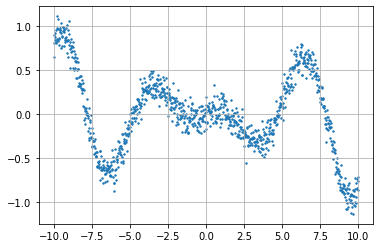

<Figure size 432x288 with 0 Axes>

In [5]:
# Display the dataset
plt.scatter(x_data[::1], y_data[::1], s=2)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

# Create the model
Create the model with two 64 units hidden layers.

In [8]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


2022-08-19 11:57:00.408798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 11:57:00.546713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 11:57:00.547142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-19 11:57:00.549181: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

## Training over 100 epochs

In [9]:
# Training
model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.2166
Epoch 2/100
32/32 [==============================] - 0s 908us/step - loss: 0.1976
Epoch 3/100
32/32 [==============================] - 0s 899us/step - loss: 0.1891
Epoch 4/100
32/32 [==============================] - 0s 898us/step - loss: 0.1857
Epoch 5/100
32/32 [==============================] - 0s 838us/step - loss: 0.1853
Epoch 6/100
32/32 [==============================] - 0s 881us/step - loss: 0.1907
Epoch 7/100
32/32 [==============================] - 0s 895us/step - loss: 0.1888
Epoch 8/100
32/32 [==============================] - 0s 906us/step - loss: 0.1873
Epoch 9/100
32/32 [==============================] - 0s 958us/step - loss: 0.1928
Epoch 10/100
32/32 [==============================] - 0s 825us/step - loss: 0.1810
Epoch 11/100
32/32 [==============================] - 0s 941us/step - loss: 0.1797
Epoch 12/100
32/32 [==============================] - 0s 896us/step - loss: 0.1780
Epoch 13/100
32

32/32 [==============================] - 0s 865us/step - loss: 0.0151
Epoch 100/100
32/32 [==============================] - 0s 873us/step - loss: 0.0159


# Predict and display

32/32 [==============================] - 0s 518us/step


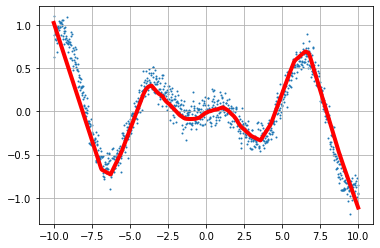

In [11]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

## Create image sequence for the video

Run this section to generate a sequence of images for the [video](https://www.youtube.com/watch?v=7z86Lxzf_2o).

To get the video from the beginning, you have to reset the model weight. Re-creating the model should reseting the weights.

In [12]:
for x in range(100):
  # One epoch
  model.fit( x_data, y_data, epochs=1, verbose=1)

  # Compute the output 
  y_predicted = model.predict(x_data)

  # Display the result
  plt.scatter(x_data[::1], y_data[::1], s=2)
  plt.plot(x_data, y_predicted, 'r', linewidth=4)
  plt.grid()
  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
  plt.ylim(bottom=-1.2)  
  #plt.show()
  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  #files.download('training-' + str(x) +'-epochs.png') 
  plt.clf()



32/32 [==============================] - 0s 893us/step - loss: 0.0148


32/32 [==============================] - 0s 512us/step


<Figure size 432x288 with 0 Axes>